In [7]:
from math import sqrt

In [2]:
a = np.array([1,2,3])

In [3]:
a**2

array([1, 4, 9])

In [4]:
import scipy

In [1]:
from scipy.stats import laplace

In [10]:
l = laplace.rvs(scale=1/sqrt(2), size=100000)

In [11]:
np.var(l)

0.9990096027552025

In [12]:
import keras

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(4, input_dim=4, use_bias=False))

In [23]:
model.get_weights()

[array([[ 0.02193981, -0.51673853, -0.52879465, -0.2022708 ],
        [ 0.68305534, -0.6197897 ,  0.00861442, -0.4733262 ],
        [-0.7415136 ,  0.57606083,  0.8628256 ,  0.27424067],
        [-0.42730176,  0.03548962, -0.35277116, -0.59438074]],
       dtype=float32)]

In [25]:
model.set_weights([np.ones((4,4))])

In [26]:
model.get_weights()

[array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=float32)]

In [29]:
import tensorflow as tf

In [31]:
tf.log

AttributeError: module 'tensorflow' has no attribute 'log'

In [32]:
import keras.backend as K

In [33]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [50]:
from scipy.stats import norm, multivariate_normal

In [149]:
??multivariate_normal

Signature:       multivariate_normal(mean=None, cov=1, allow_singular=False, seed=None)
Type:            multivariate_normal_gen
String form:     <scipy.stats._multivariate.multivariate_normal_gen object at 0x7fde2d86b5e0>
File:            ~/miniconda3/envs/statmlbayes/lib/python3.8/site-packages/scipy/stats/_multivariate.py
Source:         
class multivariate_normal_gen(multi_rv_generic):
    r"""
    A multivariate normal random variable.

    The `mean` keyword specifies the mean. The `cov` keyword specifies the
    covariance matrix.

    Methods
    -------
    ``pdf(x, mean=None, cov=1, allow_singular=False)``
        Probability density function.
    ``logpdf(x, mean=None, cov=1, allow_singular=False)``
        Log of the probability density function.
    ``cdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abseps=1e-5, releps=1e-5)``
        Cumulative distribution function.
    ``logcdf(x, mean=None, cov=1, allow_singular=False, maxpts=1000000*dim, abseps=1e-5,

In [84]:
rv1 = multivariate_normal([1, 1], [[0.25, 0], [0, 0.25]])
rv2 = multivariate_normal([-1, -1], [[0.25, 0], [0, 0.25]])

In [76]:
p = lambda x: 0.5*rv1.pdf(x) + 0.5*rv2.pdf(x)

In [77]:
from scipy.stats import rv_continuous

In [178]:
class Mixture(rv_continuous):
    def __init__(self, *args):
        self.distns = args
        super().__init__()
        
    def _pdf(self, x):
        return np.mean([d.pdf(x) for d in self.distns])
        
    def pdf(self, x):
        return np.mean([d.pdf(x) for d in self.distns])
    
    def rvs(self, size=1):
        samples = [d.rvs(size=size) for d in self.distns]
        indices = np.random.randint(low=0, high=len(self.distns), size=size)
        return np.array([samples[indices[i]][i] for i in range(size)])

In [179]:
rv = Mixture(rv1, rv2)

In [145]:
rv1.pdf([0.5,0.2])

0.10735837892662393

In [146]:
rv2.pdf([0.5,0.2])

0.0003969966540931885

In [147]:
rv.pdf([0.5,0.2])

0.053877687790358564

In [175]:
x, y = rv.rvs(size=2)

[array([[1.06352068, 1.41734729],
       [0.66368879, 1.0568629 ]]), array([[-2.02704953, -1.9545865 ],
       [-2.00366344, -1.24406749]])]


array([[ 1.06352068,  1.41734729],
       [-2.00366344, -1.24406749]])

In [182]:
x, y = rv.rvs(size=10000).T

/home/jtopping/miniconda3/envs/statmlbayes/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

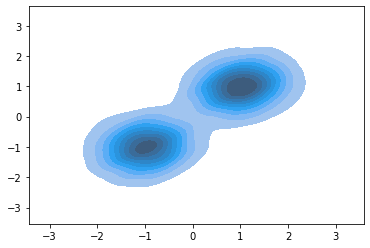

In [183]:
sns.kdeplot(x, y, shade=True)

In [184]:
noise = multivariate_normal([0,0], [[1, 0], [0, 1]])

In [53]:
rv.rvs(size=100000)

array([[-0.93677497, -0.78227141],
       [-0.16121788, -0.82794849],
       [-1.48265563, -0.5129955 ],
       ...,
       [ 0.33053176, -0.52684749],
       [-2.68352378, -0.70981931],
       [ 0.89604973,  0.0995305 ]])

In [ ]:
import seaborn as sns
sns.kdeplot(norm.rvs(size=100000))

In [46]:
norm.pdf

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.norm_gen object at 0x7fde2dc4c1f0>>

In [47]:
import numpy as np
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(x, y)

In [48]:
xv

array([[-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       ...,
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ]])